In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
matplotlib.rcParams.update({'font.size': 16}) 

import numpy as np

In [2]:
from sklearn.metrics import mean_squared_error

In [3]:
import copy

# dev 2d fit

In [4]:
# def my_vander(degx0, degx1, max_deg_total, max_degx0, max_degx1):
def my_vander(maxdegs, max_deg_total):
    """
    maxdegs: list of len number of dimensions
        list of max deg in each dimension
    max_deg_total: int
        max degree of a term
    """

    # tensor product
    xsdims = [range(deg+1) for deg in maxdegs]
    xs = np.meshgrid(*xsdims)
    
    xs = list(map(np.ravel, xs))
    
    degrees = np.array(list(zip(*xs)))
    
    mask_total_deg = np.sum(degrees,axis=-1) < max_deg_total + 1

    mask_degs = [degrees[:,i] < maxdegs[i] + 1 for i in range(len(maxdegs))]
    
#     masks = (mask_total_deg) & (mask_degs[0]) & (mask_degs[1])
    
    mask = np.prod(np.row_stack((mask_total_deg, *mask_degs)), axis=0, dtype=bool)
    
#     return degrees[mask], mask, mask_total_deg, mask_degs
    return np.array(degrees[mask])

In [5]:
def my_2d_fit(X, y, degx0=5, degx1=5, max_deg_total=5):
    print(f"X.shape = {X.shape}")
    
#     # tensor product
#     x0dims = range(degx0 + 1)
#     x1dims = range(degx1 + 1)
#     x0, x1 = np.meshgrid(x0dims, x1dims)
#     x0 = x0.ravel()
#     x1 = x1.ravel()
    
#     # limit the degree of each term to be less than the minimum degree
#     mask = x0 + x1 < (min(degx0, degx1) + 1)
    
#     degrees = list(zip(x0[mask],x1[mask]))
    
    degrees = my_vander(maxdegs=[degx0, degx1], max_deg_total=max_deg_total)
    
    
    matrix = np.stack([np.prod(X**d, axis=1) for d in degrees], axis=-1)
    
    w_ml = np.dot(np.linalg.pinv(matrix), y)
#     w_ml = np.linalg.lstsq(matrix, y)[0]
    
    
    prediction = np.dot(matrix, w_ml)
    
    return w_ml, prediction

In [6]:
def so_2d_fit(X, y):
    print(f"X.shape = {X.shape}")
    
    degrees = [(i, j) for i in range(6) for j in range(6)]  # list of monomials x**i * y**j to use
    matrix = np.stack([np.prod(x**d, axis=1) for d in degrees], axis=-1)   # stack monomials like columns
    w_ml = np.dot(np.linalg.pinv(matrix), y)
    
    prediction = np.dot(matrix, w_ml)
    
    return w_ml, prediction  

In [7]:
import rompy as rp
def polyfit2d_interpolant(x0,x1,z1,deg):
    interpolant = rp.MultivariateFits([x0,x1], z1, fit='polyfit2d', deg=deg)
    return interpolant

In [8]:
rp.fits.number_of_terms(10, 2)

66

In [9]:
rpxy = rp.fits.make_orders(10, 2)

In [10]:
# myxp = my_vander(degx0=20, degx1=10, max_deg_total=20, max_degx0=20, max_degx1=4)
# myxp, mask, mask_total_deg, mask_degs = my_vander(degs=[10,10], max_deg_total=10, maxdegs=[10,10])
myxp = my_vander(maxdegs=[5,5], max_deg_total=10)

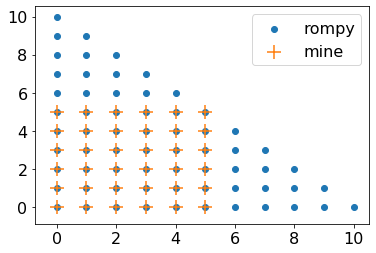

In [11]:
plt.figure()
plt.scatter(rpxy[:,0], rpxy[:,1], label='rompy')
plt.scatter(myxp[:,0], myxp[:,1], label='mine', marker='+', s=200)
plt.legend()

In [12]:
rpxyz = rp.fits.make_orders(10, 3)
myxyz = my_vander(maxdegs=[10,10,10], max_deg_total=10)

# rpxyz = rp.fits.make_orders(10, 6)
# myxyz = my_vander(maxdegs=[10,10,10,10,10,10], max_deg_total=5)

In [13]:
rpxyz.shape

(286, 3)

In [14]:
myxyz.shape

(286, 3)

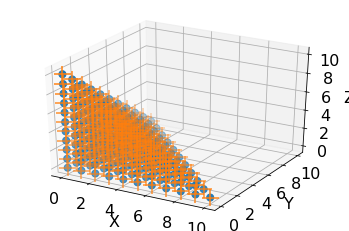

In [15]:
fig = plt.figure()
ax = fig.gca(projection="3d")
ax.scatter(rpxyz[:,0], rpxyz[:,1], rpxyz[:,2], s=50)
ax.scatter(myxyz[:,0], myxyz[:,1], myxyz[:,2], s=300, marker='+')
plt.xlabel("X")
plt.ylabel("Y")
ax.set_zlabel("Z")
plt.show()

In [16]:
x = np.random.random((100, 2))
y = np.sin(5 * x[:,0]) + .4 * np.sin(x[:,1])

In [17]:
x.shape

(100, 2)

In [18]:
# rompy
rp_int = polyfit2d_interpolant(x[:,0], x[:,1], y, deg=10)
rp_pred = rp_int([x[:,0], x[:,1]])

In [19]:
rp_int._eval.shape

(66,)

In [20]:
rp_int._eval

array([ 6.43845139e-06,  4.00150869e-01, -1.37834106e-03, -5.99328306e-02,
       -1.76266043e-02,  1.28042876e-02,  7.08592427e-02, -1.99647787e-01,
        2.34946851e-01, -1.33677696e-01,  3.00783549e-02,  4.99947673e+00,
       -2.76120040e-03,  1.82142998e-02, -6.55070847e-02,  1.72856124e-01,
       -3.25565488e-01,  3.92371094e-01, -2.64559066e-01,  7.92537660e-02,
       -3.79562638e-03,  1.21660800e-02,  1.93881225e-02, -9.38793936e-02,
        2.16981201e-01, -3.48273999e-01,  4.04630769e-01, -3.71534493e-01,
        2.30137761e-01, -6.51933615e-02, -2.09652341e+01, -7.69229527e-02,
        2.85613758e-01, -4.23608482e-01,  4.80362372e-01, -2.47360262e-01,
        1.67596725e-02,  2.23487089e-02,  8.04900041e-01,  1.81700619e-01,
       -5.93992495e-01,  4.39438194e-01, -4.51094333e-01,  2.43181133e-01,
       -5.55052476e-02,  2.30411906e+01, -2.19310582e-01,  9.08749390e-01,
       -1.93010446e-01,  1.19852788e-01, -3.01728456e-02,  7.05638456e+00,
        2.00069120e-02, -

In [21]:
my_2d, my_2d_prediction = my_2d_fit(x, y, degx0=10, degx1=10, max_deg_total=5)

X.shape = (100, 2)


In [22]:
my_2d.shape

(21,)

In [23]:
my_2d

array([ 1.96763840e-02,  4.28037235e+00,  7.14841730e+00, -4.96233535e+01,
        5.41097844e+01, -1.68901428e+01,  4.18126325e-01, -3.25988395e-01,
        3.77537190e-01,  5.02702931e-01, -5.01095293e-01, -3.52842086e-02,
        5.42625973e-01, -1.45514008e+00,  5.23897408e-01,  1.25757050e-01,
        2.50491437e-01,  4.45854252e-01, -4.60243635e-01, -3.55402984e-01,
        2.86372379e-01])

In [24]:
so_2d, so_2d_prediction = so_2d_fit(x, y)

X.shape = (100, 2)


In [25]:
so_2d

array([ 4.72436374e-03,  6.88792896e-01, -1.85230655e+00,  7.08241723e+00,
       -1.08957275e+01,  5.37611602e+00,  4.77759737e+00, -1.01392925e+01,
        5.97965864e+01, -1.81965087e+02,  2.42321907e+02, -1.11307497e+02,
        3.69381407e+00,  7.13187625e+01, -4.22508825e+02,  1.21689761e+03,
       -1.55290982e+03,  6.95504176e+02, -4.06583141e+01, -1.91683512e+02,
        1.15058732e+03, -3.24875241e+03,  4.07071036e+03, -1.80321365e+03,
        4.45288280e+01,  2.14170898e+02, -1.30544370e+03,  3.66870840e+03,
       -4.56802247e+03,  2.01628694e+03, -1.32960097e+01, -8.41892899e+01,
        5.21652599e+02, -1.46985308e+03,  1.82973888e+03, -8.07835037e+02])

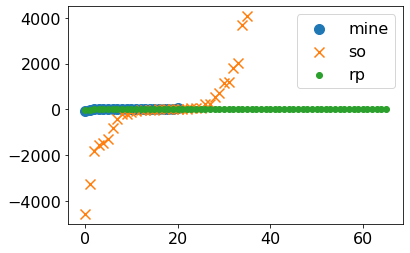

In [26]:
plt.figure()
plt.scatter(range(len(my_2d)), np.sort(my_2d), s=100, label='mine')
plt.scatter(range(len(so_2d)), np.sort(so_2d), marker='x', s=100, label='so')


plt.scatter(range(len(rp_int._eval)), np.sort(rp_int._eval), label='rp')
plt.legend()

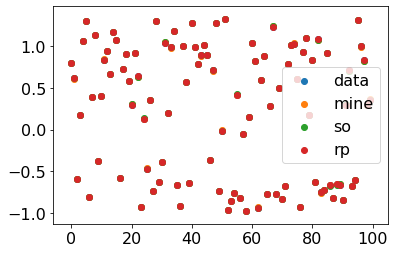

In [27]:
plt.figure()
plt.scatter(range(len(y)), y, label='data')
plt.scatter(range(len(y)), my_2d_prediction, label='mine')
plt.scatter(range(len(y)), so_2d_prediction, label='so')
plt.scatter(range(len(y)), rp_pred, label='rp')
plt.legend()

In [28]:
mean_squared_error(y, my_2d_prediction)

7.963150823256008e-06

In [29]:
mean_squared_error(y, so_2d_prediction)

3.7164922423934514e-06

In [30]:
mean_squared_error(y, rp_pred)

8.341818799282116e-15

# dev iterative 2d

## define data to fit

In [31]:
# X = np.random.random((100, 2))
# y = np.sin(5 * X[:,0]) + .4 * np.sin(X[:,1])

In [32]:
x = np.linspace(0,1,10)
xx, yy = np.meshgrid(x,x)
xx = xx.ravel()
yy = yy.ravel()
X = np.zeros(shape=(len(xx), 2))
X[:,0] = xx
X[:,1] = yy

y = np.sin(5 * X[:,0]) + .4 * np.sin(X[:,1])

In [33]:
Xval = np.random.random((500, 2))
yval = np.sin(5 * Xval[:,0]) + .4 * np.sin(Xval[:,1])

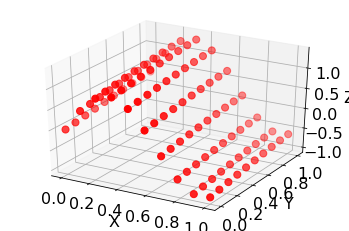

In [34]:
fig = plt.figure()
ax = fig.gca(projection="3d")
ax.scatter(X[:,0], X[:,1], y, c="r", s=50)
plt.xlabel("X")
plt.ylabel("Y")
ax.set_zlabel("Z")
plt.show()


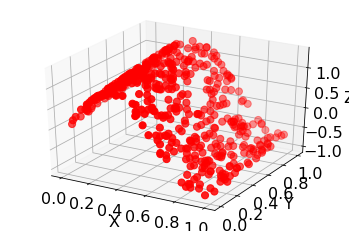

In [35]:
fig = plt.figure()
ax = fig.gca(projection="3d")
ax.scatter(Xval[:,0], Xval[:,1], yval, c="r", s=50)
plt.xlabel("X")
plt.ylabel("Y")
ax.set_zlabel("Z")
plt.show()


## func dev

In [156]:

# should add in validation data
# so that I can pick which basis to add
# basis on min(validation data)

def greedy2dfit(X, y, maxdegs=[5,5], max_deg_total=10, tol=1e-4):
    print(f"X.shape = {X.shape}")
    
    N, ndim = X.shape
    
    degrees = my_vander(maxdegs=maxdegs, max_deg_total=max_deg_total)
    # we have to change to '.tolist()' so that we can
    # do list comparison
    degrees = degrees.tolist()
    
    
    steps = len(degrees)
    
#     # tensor product
#     x0dims = range(7)
#     x1dims = range(7)
#     x0, x1 = np.meshgrid(x0dims, x1dims)
#     x0 = x0.ravel()
#     x1 = x1.ravel()
    
#     # degrees contains the list of all possible combinations
#     degrees = list(zip(x0,x1))
  
    
    
    # we want to perform a greedy search and only add
    # basis elements that have the largest projection error
    
    
    print(len(degrees))
#     print(degrees)


    # seed with first element
    seed_deg = degrees[0]
    # the first one should be the bias?
    
#     assert (seed_deg == [0]*ndim).all(), f"seed_deg is {seed_deg} and is expected to be the bias"
    assert (seed_deg == [0]*ndim), f"seed_deg is {seed_deg} and is expected to be the bias"
    
#     assert (seed_deg == list([0]*ndim)), f"seed_deg is {seed_deg} and is expected to be the bias"
    
    def make_design_matrix(X, degrees):
        matrix = np.stack([np.prod(X**d, axis=1) for d in degrees], axis=-1)
        return matrix
    
    seed_matrix = make_design_matrix(X, seed_deg)
    
    def compute_weights(matrix, y):
        return np.dot(np.linalg.pinv(matrix), y)
    
    # seed maximum likelihood weights
    seed_w_ml = compute_weights(seed_matrix, y)

    def predict(matrix, w_ml):
        return np.dot(matrix, w_ml)
    
    seed_prediction = predict(seed_matrix, seed_w_ml)
    
    # greedy points is a list that stores the degrees that have been selected
#     greedy_points = [seed_deg.tolist()]
    greedy_points = [seed_deg]
    print(f"initial greedy points = {greedy_points}")
    
    for step in range(steps):
        ws = []
        ps = []
        errors = []
        # greedy search
        
#         print("shuffling!")
#         np.random.shuffle(degrees)
        
        for deg in degrees:
#             print(f"working deg = {deg}")
            
            if deg in greedy_points:
#                 print(f"skipping deg = {deg}")
                ws.append(0)
                ps.append(0)
                errors.append(0)
                continue
            
            trial_points = copy.copy(greedy_points)
            trial_points.append(deg)
            matrix = make_design_matrix(X, trial_points)
            w_ml = compute_weights(matrix, y)
            pred = predict(matrix, w_ml)
            
            error = mean_squared_error(y, pred)
            
            ws.append(w_ml)
            ps.append(pred)
            errors.append(error)
            
        errors = np.array(errors)
        max_error_idx = np.argmax(errors)
        max_error = errors[max_error_idx]
        
        if max_error < tol:
            print("tol reached, exiting")
            break
        
#         print(max_error_idx)
#         print(degrees)
        worst_deg = degrees[max_error_idx]
        if worst_deg in greedy_points:
            print(f"worst_deg = {worst_deg} is already in greed_points. Exiting")
            break
        else:
            print(f"on step = {step}/{steps}, error = {max_error}, adding deg = {worst_deg}")
            greedy_points.append(worst_deg)

#     print(greedy_points)
    return greedy_points

In [347]:
greedy_points = greedy2dfit(X, y, maxdegs=[7,2], max_deg_total=7, tol=1e-10)

X.shape = (100, 2)
21
initial greedy points = [[0, 0]]
on step = 0/21, error = 0.5132640939406392, adding deg = [0, 2]
on step = 1/21, error = 0.5118564207171573, adding deg = [0, 1]
on step = 2/21, error = 0.35809692018304196, adding deg = [1, 2]
on step = 3/21, error = 0.3254655293998616, adding deg = [5, 2]
on step = 4/21, error = 0.260703753510967, adding deg = [6, 1]
on step = 5/21, error = 0.2342720265824767, adding deg = [1, 1]
on step = 6/21, error = 0.18731904803960284, adding deg = [1, 0]
on step = 7/21, error = 0.1759910464148011, adding deg = [7, 0]
on step = 8/21, error = 0.09235081110886717, adding deg = [4, 2]
on step = 9/21, error = 0.08598717146717709, adding deg = [2, 2]
on step = 10/21, error = 0.08558470298349691, adding deg = [3, 2]
on step = 11/21, error = 0.04034637648160173, adding deg = [5, 1]
on step = 12/21, error = 0.030459924390459536, adding deg = [4, 1]
on step = 13/21, error = 0.029719619767590008, adding deg = [2, 1]
on step = 14/21, error = 0.029610579

In [348]:
greedy_points[0]

[0, 0]

In [349]:
len(greedy_points)

21

In [350]:
greedy_points

[[0, 0],
 [0, 2],
 [0, 1],
 [1, 2],
 [5, 2],
 [6, 1],
 [1, 1],
 [1, 0],
 [7, 0],
 [4, 2],
 [2, 2],
 [3, 2],
 [5, 1],
 [4, 1],
 [2, 1],
 [3, 1],
 [6, 0],
 [5, 0],
 [2, 0],
 [4, 0],
 [3, 0]]

In [351]:
def make_design_matrix(X, degrees):
    matrix = np.stack([np.prod(X**d, axis=1) for d in degrees], axis=-1)
    return matrix

def compute_weights(matrix, y):
    return np.dot(np.linalg.pinv(matrix), y)

# def predict(matrix, w_ml):
#     return np.dot(matrix, w_ml)

# def mega_predict(X, degrees):
#     matrix = make_design_matrix(X, greedy_points)
#     w_ml = compute_weights(matrix, y)
#     prediction = predict(matrix, w_ml)
#     return prediction, w_ml


def predict(X, greedy_points, w_ml):
    
    matrix = make_design_matrix(X, greedy_points)
    
    return np.dot(matrix, w_ml)

In [352]:
matrix = make_design_matrix(X, greedy_points)
w_ml = compute_weights(matrix, y)

In [353]:
prediction = predict(X, greedy_points, w_ml)

In [354]:
prediction_val = predict(Xval, greedy_points, w_ml)

In [355]:
mean_squared_error(y, prediction)

1.932417374275e-06

In [356]:
mean_squared_error(yval, prediction_val)

1.562244054920426e-06

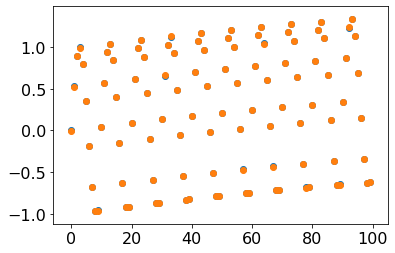

In [357]:
plt.figure()
plt.scatter(range(len(y)), y)
plt.scatter(range(len(y)), prediction)

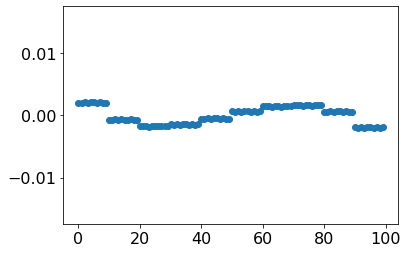

In [358]:
plt.figure()
plt.scatter(range(len(y)), y - prediction)

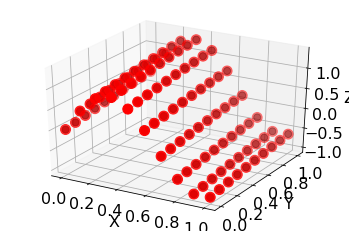

In [359]:
fig = plt.figure()
ax = fig.gca(projection="3d")
ax.scatter(X[:,0], X[:,1], y, c="r", s=100)
ax.scatter(X[:,0], X[:,1], prediction, c="k", s=50)
plt.xlabel("X")
plt.ylabel("Y")
ax.set_zlabel("Z")
plt.show()


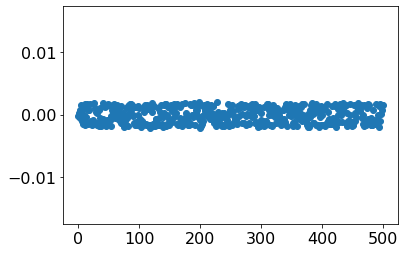

In [360]:
plt.figure()
plt.scatter(range(len(yval)), yval - prediction_val)

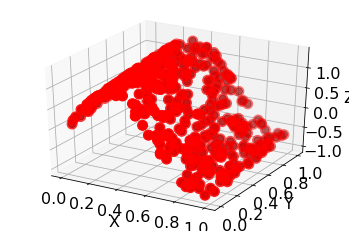

In [361]:
fig = plt.figure()
ax = fig.gca(projection="3d")
ax.scatter(Xval[:,0], Xval[:,1], yval, c="r", s=100)
ax.scatter(Xval[:,0], Xval[:,1], prediction_val, c="k", s=50)
plt.xlabel("X")
plt.ylabel("Y")
ax.set_zlabel("Z")
plt.show()


In [362]:
# compare with rompy

In [363]:
# rompy
rp_int = polyfit2d_interpolant(X[:,0], X[:,1], y, deg=7)
rp_pred = rp_int([X[:,0], X[:,1]])

In [364]:
rp_int._eval.shape

(36,)

In [365]:
len(greedy_points)

21

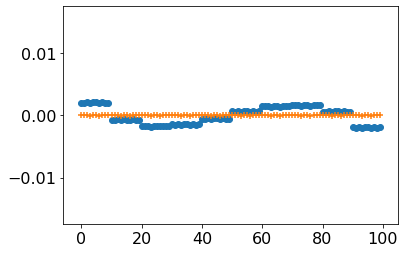

In [366]:
plt.figure()
plt.scatter(range(len(y)), y - prediction)
plt.scatter(range(len(y)), y - rp_pred, marker='+')